In [1]:
import glacierml as gl
import pandas as pd
import numpy as np

2023-07-24 10:41:29.581453: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-24 10:41:29.626315: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 10:41:30.301167: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
pd.set_option('display.max_columns', None)


In [3]:
parameterization = '4'
data = gl.parameterize_data(parameterization)
model_statistics = pd.read_pickle('zults/model_statistics_' + parameterization + '.pkl')

architecture_weights, residual_model = gl.compute_model_weights(
     parameterization, pth = '/data/fast1/glacierml/data'
)

architecture_weights
aw = architecture_weights

In [4]:
df = pd.read_hdf(
            'predicted_thicknesses/compiled_raw_' + '4' + '.h5',
            key = 'compiled_raw', mode = 'a'
        )

pfdsa = gl.parameterize_data('4')

pfdsa

df = pd.merge(df,pfdsa, how = 'inner', on = 'RGIId')

compiled_raw = df.groupby('RGIId')

In [5]:
model_list = []
for i in range(0,25,1):
    model_list.append(str(i))

In [6]:
mean_list = []
var_list = []
mean_int = []
var_int = []
from tqdm import tqdm
for this_rgi_id, obj in tqdm(compiled_raw):
    predictions = np.array(obj[model_list])
    mean, mean_ci, var, var_ci = gl.calculate_confidence_intervals(predictions)
    wm, wmi, wv, wvi = gl.weighter(mean, mean_ci, var, var_ci, '4')
    
    mean_list.append(wm)
    var_list.append(wv)
    
    mean_int.append(wmi)
    var_int.append(wvi)

100%|██████████| 304/304 [02:00<00:00,  2.52it/s]


In [76]:
x = np.array(mean_list)[:,0]
y = np.sqrt(np.array(var_list)[:,0])

Text(0, 0.5, 'Bootstrap STD')

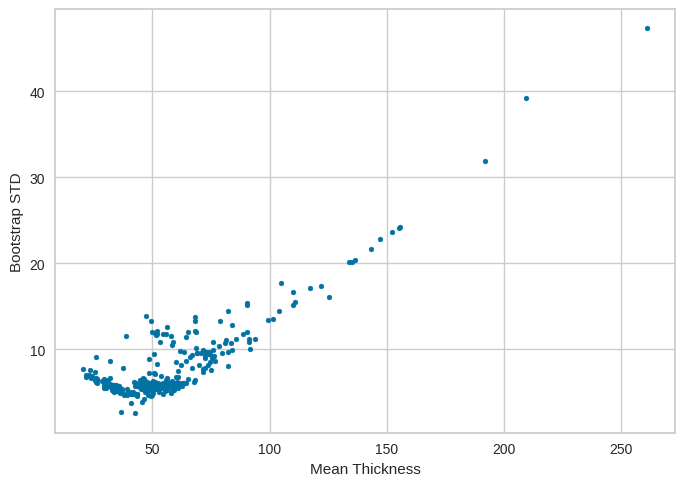

In [77]:
import matplotlib.pyplot as plt
plt.scatter(x,y, marker = '.')
plt.xlabel('Mean Thickness')
plt.ylabel('Bootstrap STD')

In [78]:
x_error = np.array(mean_int)

x_error = x_error[:,0,:]

xr = x_error[:,1] - x_error[:,0]

In [83]:
y_error = np.array(np.sqrt(var_int))

y_error = y_error[:,0,:]

yr = y_error[:,1] - y_error[:,0]

ValueError: 'x' and 'y' must have the same size

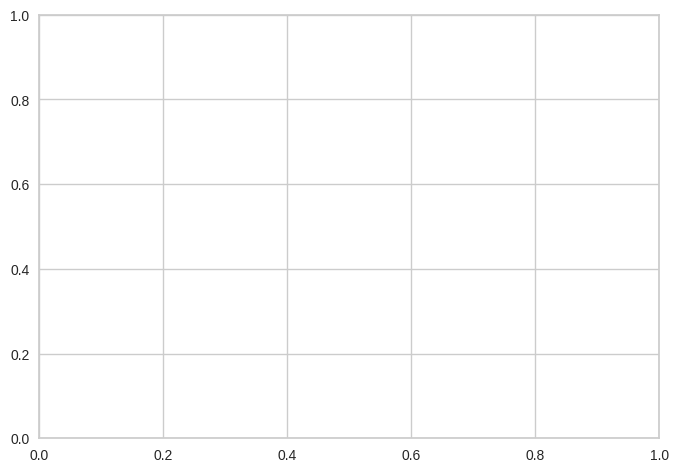

In [87]:
plt.errorbar(obj['Area'], x, yerr = xr, linestyle='None', 
             marker='o', markerfacecolor = 'k', markersize = 5, 
             ecolor = 'b', color = 'k', linewidth = 1, capsize = 2.5, capthick = 1
            )

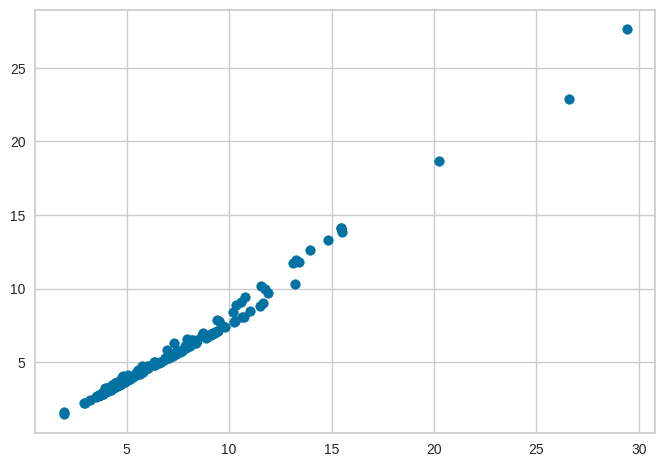

In [86]:
plt.scatter(xr, yr)